**Chapter 4 - Bivariate Numerical Visualization**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://www.ishelp.info/data/imdb.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


**CORRELATION**: You can use this function to make a nice dataframe of the correlation between each NUMERICAL variable.

Close to 1 or -1: there's a correlation between the two variables
Close to 0: There is NOT a correlation between the two

You have to be the judge on all correlations in between. Basically, if it's above 0.5 or below -0.5, it's worth your attention.

In [7]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.corr()




##df.corr()
#this displays them

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


**PLOT THE DATA**: Make a simple scatterplot of your two variables so you can SEE the data. *KNOW THY DATA.*

Do you see a relationship? What does it look like? Does it seem like there's some sort of pattern in the data?

The following plot shows that generally, as the rating increases, so does the metascore:
    1) You know that it makes sense that as a rating is higher, so would the metascore in general
    2) If you put a line next this data, then you could use this line to predict how high a metascore would be based on a rating.

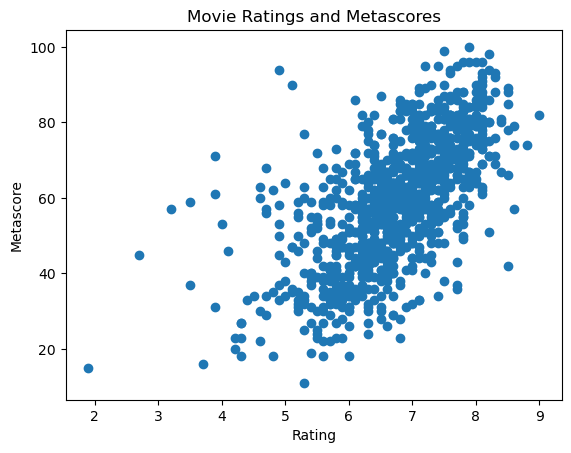

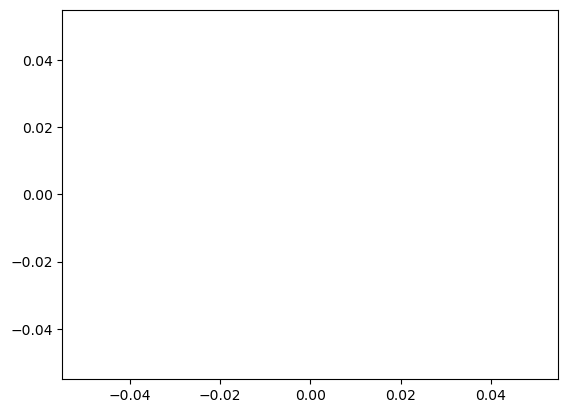

In [23]:
from scipy import stats


plt.scatter(df.Rating, df.Metascore)
plt.title('Movie Ratings and Metascores')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

n, b, r, p, err = stats.linregress(df.Rating, df.Metascore)
num = int(df.Rating.max())
nums = range(num)
plt.plot(nums, n*nums+b, "r--")
plt.show()

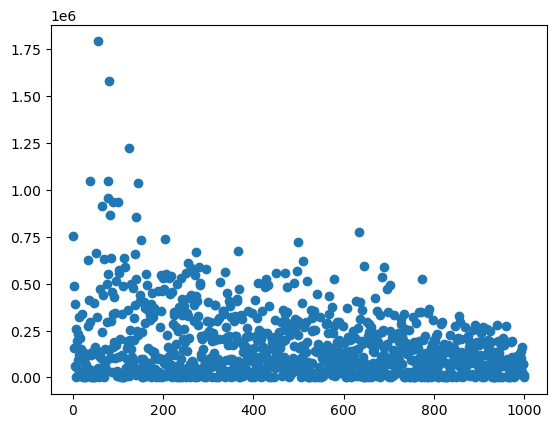

In [9]:
plt.scatter(df.Rank, df.Votes)

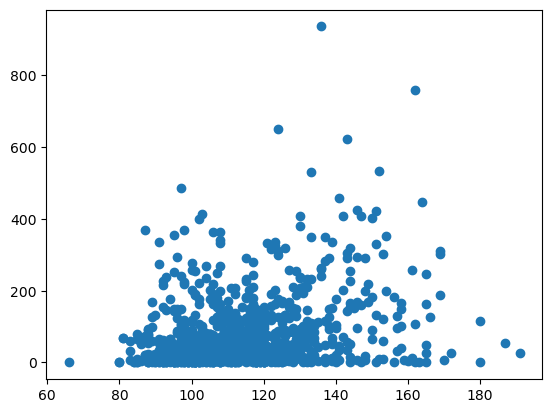

In [14]:
plt.scatter(df["Runtime (Minutes)"], df["Revenue (Millions)"])

(array([612., 152.,  57.,  33.,  11.,   3.,   2.,   0.,   1.,   1.]),
 array([  0.   ,  93.663, 187.326, 280.989, 374.652, 468.315, 561.978,
        655.641, 749.304, 842.967, 936.63 ]),
 <BarContainer object of 10 artists>)

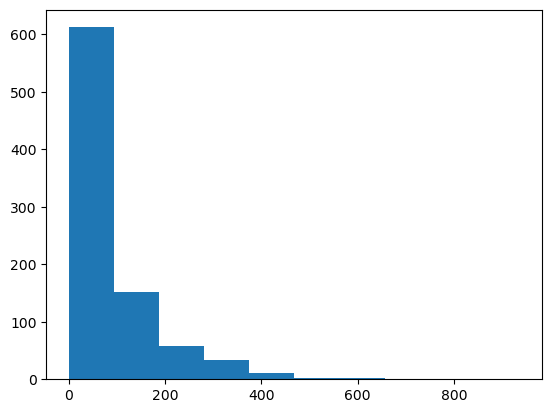

In [16]:
plt.hist(df["Revenue (Millions)"])

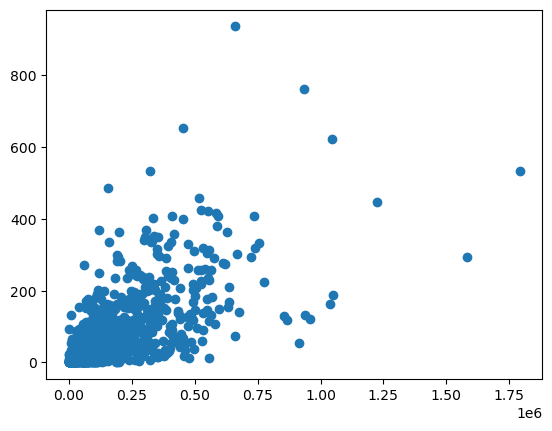

In [17]:
plt.scatter(df.Votes, df["Revenue (Millions)"])

**CORRELATION**: Yep, the correlation between rating and metascore is above 0.5.

In [17]:
df.Rating.corr(df.Metascore)

0.6318965100387063

In [11]:
df.corr(numeric_only=True)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


**FILTERING DATA**: Suppose you only want to see data concerning drama movies or action/adventure/sci-fi movies? Use the following code to "filter" specific genres of movies.

In [18]:
drama = df[df.Genre == 'Drama']
action = df[df.Genre == 'Action,Adventure,Sci-Fi']
action

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
24,25,Independence Day: Resurgence,"Action,Adventure,Sci-Fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0
32,33,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016,144,7.1,275510,155.33,52.0
35,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0
48,49,Star Trek Beyond,"Action,Adventure,Sci-Fi",The USS Enterprise crew explores the furthest ...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...",2016,122,7.1,164567,158.80,68.0
60,61,Batman v Superman: Dawn of Justice,"Action,Adventure,Sci-Fi",Fearing that the actions of Superman are left ...,Zack Snyder,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",2016,151,6.7,472307,330.25,44.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0


LOOK AT THIS! You can plot your drama movies and action movies on the same plot using DIFFERENT COLORS. But you have to think this through:

EXPLANATION OF CODE: You're basically making TWO scatterplots and overlaying them on top of each other, and giving them different shapes and colors.

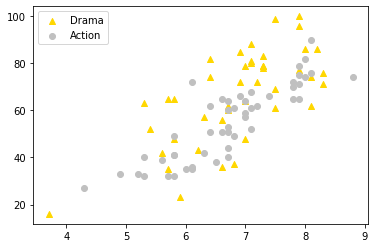

In [19]:
plt.scatter(drama.Rating, drama.Metascore, label='Drama', marker='^', color='gold')
plt.scatter(action.Rating, action.Metascore, label='Action', marker='o', color='silver')
plt.legend()

In [1]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*UH OH: The plot below doesn't look pretty. Something else is going on.*

*EXPLANATION*: You can't use one line to explain this data. In other words, YOU CANNOT PREDICT CHARGES (money spent on doctors and medicine) BY SOMEONE'S AGE. Do you think BMI or smoking plays a role in the amount of charges placed on insurance? 

That's what you're seeing happening here: another variable is at play.

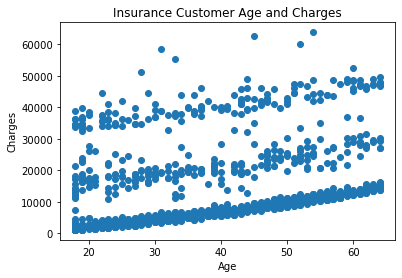

In [20]:
import numpy as np
from matplotlib import pyplot as plt

plt.scatter(df.age, df.charges)
plt.title('Insurance Customer Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

**3 ASSUMPTIONS FOR FITTING A LINE:**

1) **CONTINUOUS DATA**: Is the data evenly spread throughout the graph, or do groups seem to be forming?
2) **LINEAR RELATIONSHIP**: Does the data follow along a straight line, or is it curved?
3) **CONSTANT VARIANCE (Heteroscedicity)**: If it follows along a straight line, is it evenly spread AROUND that line, or is it clumpted together in one area and super-spread away in other areas?

Basically, patterns that don't follow a straight line = you probably SHOULDN'T use a straight line 

(use something else, or transform the data, which is the next part of this class)

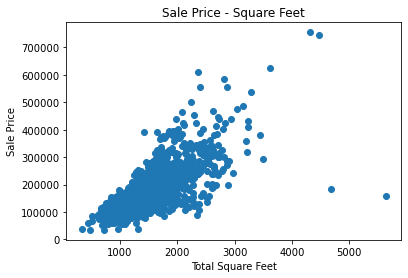

r = 0.7169
p = 0.0


In [21]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('https://www.ishelp.info/data/housing.csv')

plt.scatter(df.TotalSF, df.SalePrice)
plt.title('Sale Price - Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.show()


# shows a nice pretty table at the bottom for correlation and p-value
corr = stats.pearsonr(df.TotalSF, df.SalePrice)
print('r = ' + str(round(corr[0], 4)))
print('p = ' + str(round(corr[1], 4)))

In [ ]:
# The following makes sure you have your data on a scatter plot
plt.scatter(df.Charges, df.Age)
plt.title('Sale Price - Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')

# slope = 109.2766, intercept = 15955.1208, etc. you can see above
# let's save all these values
m, b, r, p, err = stats.linregress(df.TotalSF, df.SalePrice)

# Create a bunch of values of x to use for the line plot by using the range function (0 to max value of squared feet)
num = df.TotalSF.max()
nums = range(int(num))

# ADD A LINE TO THE SCATTER PLOT
# This line plot requires(index list, slope * index list + y-intercept, line format)
# Notice nums is your x value, and the slope and intercept from your regression model are used for the y-value
# For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
plt.plot(nums,m * nums + b,"r--")

# Some pretty statistics to your graph
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

**CHECK ASSUMPTIONS:**

1) CONTINUOUS DATA: CHECK (seems like it's spread evenly, no groups, just some faraway points)
2) LINEAR RELATIONSHIP: CHECK (No curves or anything in the data--it seems to flow upward nicely in a straight line)
3) CONSTANT VARIANCE (Heteroscedacity): Uh oh

The datapoints are spread out on one side and clumped together on another. It's not evenly spread AROUND the line. See below:

In [26]:
df = pd.read_csv('https://www.ishelp.info/data/housing.csv')

# Calculate the regression line
# Notice how you have a slope, intercept, correlation coefficient, p-value, standard error, etc., 
# all in a nice list that you can pull from
stats.linregress(df.TotalSF, df.SalePrice)

LinregressResult(slope=109.27661587643634, intercept=15955.120847421727, rvalue=0.7168830793692805, pvalue=1.183940787188584e-230, stderr=2.7832576955719657, intercept_stderr=4444.833300020272)

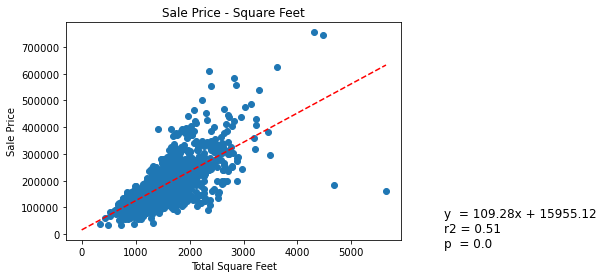

In [28]:
# The following makes sure you have your data on a scatter plot
plt.scatter(df.TotalSF, df.SalePrice)
plt.title('Sale Price - Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')

# slope = 109.2766, intercept = 15955.1208, etc. you can see above
# let's save all these values
m, b, r, p, err = stats.linregress(df.TotalSF, df.SalePrice)

# Create a bunch of values of x to use for the line plot by using the range function (0 to max value of squared feet)
num = df.TotalSF.max()
nums = range(int(num))

# ADD A LINE TO THE SCATTER PLOT
# This line plot requires(index list, slope * index list + y-intercept, line format)
# Notice nums is your x value, and the slope and intercept from your regression model are used for the y-value
# For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
plt.plot(nums,m * nums + b,"r--")

# Some pretty statistics to your graph
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

SEABORN: The seaborn package has ALL of this regression code already built in!

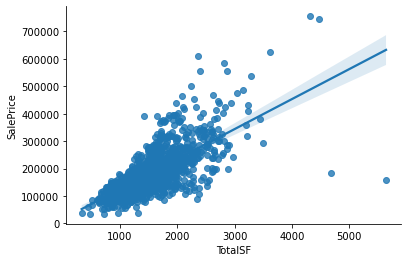

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('https://www.ishelp.info/data/housing.csv')

# Just plug-and-chug what you want to use for x, y, and what data you are pulling from
sns.regplot(data=df, x='TotalSF', y='SalePrice') # The regression line is built-in to the .regplot object
sns.despine(top=True, right=True) # just gets rid of the top and right lines

**CHECKING ASSUMPTIONS**: So, there may be a problem with our 3RD ASSUMPTION, but we WANT TO MAKE SURE. So we run a test:

* White Test: https://en.wikipedia.org/wiki/White_test 
* Bruesch-Pagan Test: https://en.wikipedia.org/wiki/Breusch-Pagan_test

DETAILS: Basically, you are calculating residuals (how far away your data points are from the model) and seeing if they more or less equal, no matter where they are located. These tests use particular calculations and come up with a Lagrange Multiplier and F-Statistic, and see if they follow a chi-square distribution or F-distribution.

**NULL HYPOTHESIS**: Assumption is fine (status quo)
**ALTERNATIVE HYPOTHESIS**: Assumption is NOT fine (question the norm!)

*WHAT YOU NEED TO KNOW*: **Low p-value** = WATCH OUT! (Problem with heteroscedasticity)

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('https://www.ishelp.info/data/housing.csv')

# Fit the OLS model
# EASY! Choose your y, x, and which data to use, then save it as "model"
model = ols(formula='SalePrice~TotalSF', data=df).fit()

# Use the .params to see the "parameters" or slope/intercept of your y=mx+b line!
model.params

Intercept    15955.120847
TotalSF        109.276616
dtype: float64

**WHITE** and **BREUSCH-PAGAN Tests**

Simply use the following functions for your tests
1) Pull the residuals (distance each point is from the line) and observed (original data) values from your model to plug-and-chug into the functions
2) Save each test


In [35]:
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

# The tests actually gives lists of four values: LM Stat, p-value for LM, F-Stat, and p-value for F!
print("White Test:", white_test)
print("Breusch-Pagan Test:", bp_test)

White Test: (680.1668819920425, 2.0120473124546016e-148, 635.3943710379158, 3.9098916285969647e-199)
Breusch-Pagan Test: (306.8760995043398, 1.0465412337717473e-68, 388.01151626898525, 8.952082129095136e-77)


PULL VALUES FROM THE ABOVE LISTS to make a table

In [31]:
# Makes a pretty table of values
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

# Round to 3 decimal places
output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,680.167,0.0,635.394,0.0
Breusch-Pagan,306.876,0.0,388.012,0.0


P-values are EXTREMELY LOW. (Look at the original values in the lists). 

**CONCLUSION**: Reject Null Hypothesis 
(The data is not "varied" evenly across the line, or non-constant variance)
(Assumption of Heteroscadicity is not met)